**E22CSEU0020**

**Akshat Aggarwal**

**Question-1**

In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt

In [2]:
def check_stationarity(series):
    # ADF Test
    adf_result = adfuller(series, autolag='AIC')
    adf_stat, adf_p_value = adf_result[0], adf_result[1]
    
    # KPSS Test
    kpss_result = kpss(series, regression='c', nlags="auto")
    kpss_stat, kpss_p_value = kpss_result[0], kpss_result[1]

    # Determine Stationarity
    adf_stationary = adf_p_value < 0.05
    kpss_stationary = kpss_p_value >= 0.05

    print("ADF Statistic:", adf_stat, "| p-value:", adf_p_value)
    print("KPSS Statistic:", kpss_stat, "| p-value:", kpss_p_value)

    if not adf_stationary and not kpss_stationary:
        print("Both tests conclude that the series is not stationary.")
        print("Series is Non-Stationary.")
    elif adf_stationary and kpss_stationary:
        print("Both tests conclude that the series is stationary.")
        print("Series is Stationary.")
    elif not adf_stationary and kpss_stationary:
        print("KPSS = stationary, ADF = not stationary.")
        print("Series is Trend Stationary. Remove the trend to make it strictly stationary.")
    elif adf_stationary and not kpss_stationary:
        print("KPSS = not stationary, ADF = stationary.")
        print("Series is Difference Stationary. Use differencing to make it stationary.")

In [3]:
data = pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
series = data['#Passengers']

In [5]:
print("Testing the original series:")
check_stationarity(series)

Testing the original series:
ADF Statistic: 0.8153688792060597 | p-value: 0.9918802434376411
KPSS Statistic: 1.6513122354165206 | p-value: 0.01
Both tests conclude that the series is not stationary.
Series is Non-Stationary.


C:\Users\akagg\AppData\Local\Temp\ipykernel_20144\567773574.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags="auto")


**Question:-2**

In [6]:
first_diff = series.diff().dropna()
print("\nTesting the series after first differencing:")
check_stationarity(first_diff)


Testing the series after first differencing:
ADF Statistic: -2.829266824169992 | p-value: 0.0542132902838265
KPSS Statistic: 0.023897614400183967 | p-value: 0.1
KPSS = stationary, ADF = not stationary.
Series is Trend Stationary. Remove the trend to make it strictly stationary.


C:\Users\akagg\AppData\Local\Temp\ipykernel_20144\567773574.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags="auto")


**Question:-3**

In [7]:
log_series = np.log(series)
log_diff = log_series.diff().dropna()
seasonal_diff = log_diff.diff(12).dropna()

In [8]:
print("\nTesting the series after log transform, first differencing, and seasonal differencing:")
check_stationarity(seasonal_diff)


Testing the series after log transform, first differencing, and seasonal differencing:
ADF Statistic: -4.443324941831128 | p-value: 0.0002485912311383993
KPSS Statistic: 0.07319096983125448 | p-value: 0.1
Both tests conclude that the series is stationary.
Series is Stationary.


C:\Users\akagg\AppData\Local\Temp\ipykernel_20144\567773574.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags="auto")


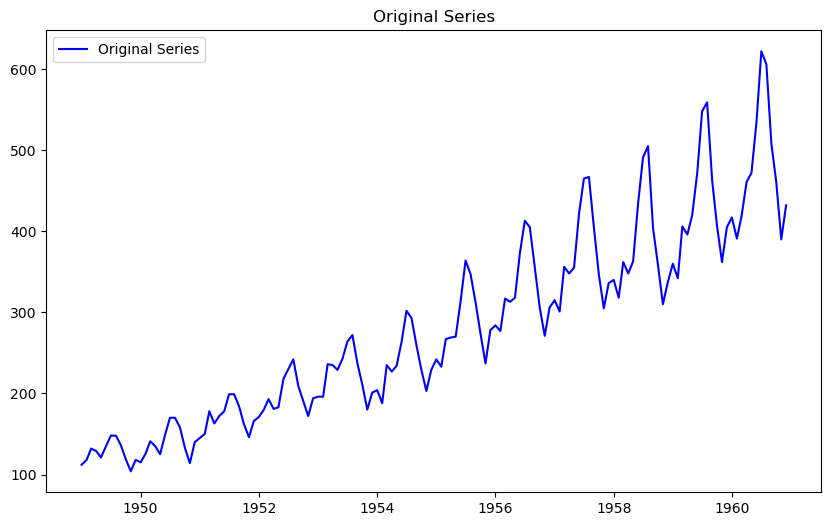

In [9]:
# Plotting the original series
plt.figure(figsize=(10, 6))
plt.plot(series, label='Original Series', color='blue')
plt.title('Original Series')
plt.legend(loc='best')
plt.show()

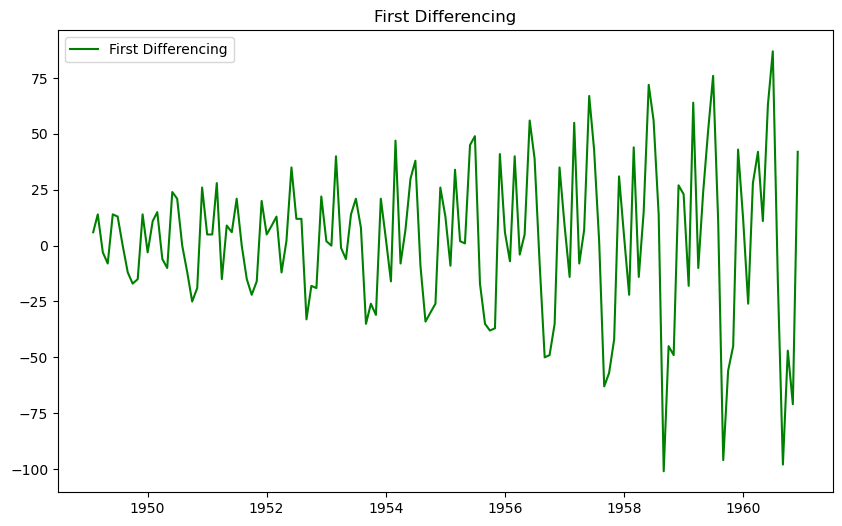

In [10]:
# Plotting the first differencing
plt.figure(figsize=(10, 6))
plt.plot(first_diff, label='First Differencing', color='green')
plt.title('First Differencing')
plt.legend(loc='best')
plt.show()

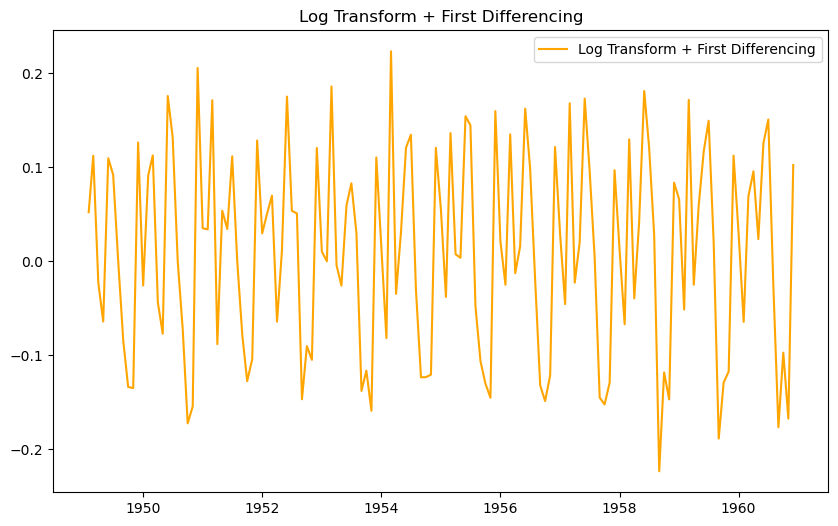

In [11]:
# Plotting log transform and first differencing
plt.figure(figsize=(10, 6))
plt.plot(log_diff, label='Log Transform + First Differencing', color='orange')
plt.title('Log Transform + First Differencing')
plt.legend(loc='best')
plt.show()

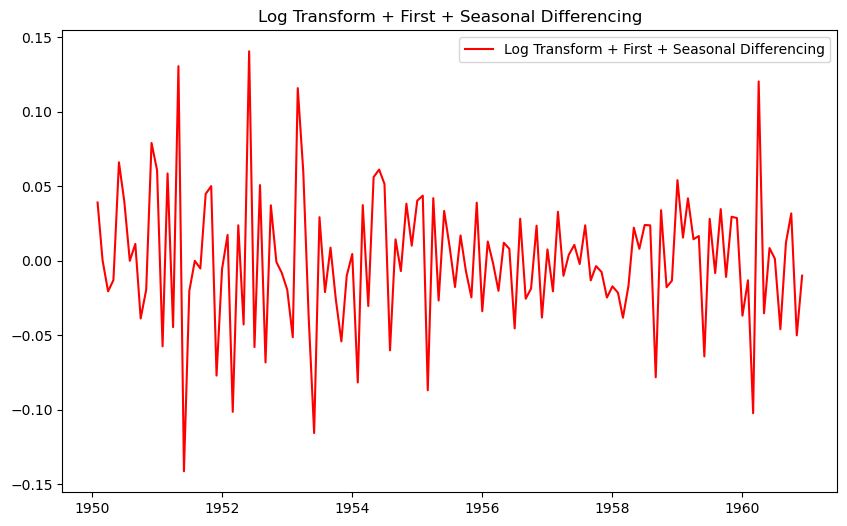

In [12]:
# Plotting log transform, first differencing, and seasonal differencing
plt.figure(figsize=(10, 6))
plt.plot(seasonal_diff, label='Log Transform + First + Seasonal Differencing', color='red')
plt.title('Log Transform + First + Seasonal Differencing')
plt.legend(loc='best')
plt.show()